# Fresh products

In [2]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import sys

# Move two levels up (to the project root) and append the `src` folder
src_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))

# Append src to sys.path
sys.path.append(src_path)

from src import query_engines, dataframe_visualizer

q = query_engines.QueryEngines()

## Question 1

*To answer the first questions. I think that a first approach would be to see % of orders containing at least one fresh product, splitted by country also global. And then also by top parnter AAA. Segment also by MFC and Partners.*

In [16]:
q.prepare_query(
    'migrated_partners.sql'
    ,params=None
    ,to_load_file='migrated_partners'
    ,load_from_to_load_file='migrated_partners'
    
)

df_migrated_partners  = q.query_run_starburst()
df_migrated_partners

,country_code,store_subvertical,n_store_id,n_store_id_migrated,perc_store_id_migrated
0,AD,QCPartners,1,0,0.00
1,AM,QCPartners,105,9,0.09
2,BA,QCPartners,83,59,0.71
3,BG,MFC,1,1,1.00
4,BG,QCPartners,195,88,0.45
5,CI,MFC,1,1,1.00
6,CI,QCPartners,61,24,0.39
7,ES,MFC,25,24,0.96
8,ES,QCPartners,3160,682,0.22
9,GE,QCPartners,518,28,0.05


In [17]:
df_pivoted = df_migrated_partners.pivot(index='country_code',columns='store_subvertical',values=['n_store_id','n_store_id_migrated','perc_store_id_migrated'])
df_pivoted.columns = [f'{col[0]}_{col[1]}' for col in df_pivoted.columns]
df_pivoted = df_pivoted.reset_index()
df_pivoted = df_pivoted.fillna(0.00)
df_pivoted

,country_code,n_store_id_MFC,n_store_id_QCPartners,n_store_id_migrated_MFC,n_store_id_migrated_QCPartners,perc_store_id_migrated_MFC,perc_store_id_migrated_QCPartners
0,AD,0.0,1.0,0.0,0.0,0.00,0.00
1,AM,0.0,105.0,0.0,9.0,0.00,0.09
2,BA,0.0,83.0,0.0,59.0,0.00,0.71
3,BG,1.0,195.0,1.0,88.0,1.00,0.45
4,CI,1.0,61.0,1.0,24.0,1.00,0.39
5,ES,25.0,3160.0,24.0,682.0,0.96,0.22
6,GE,0.0,518.0,0.0,28.0,0.00,0.05
7,GH,0.0,52.0,0.0,3.0,0.00,0.06
8,HR,0.0,314.0,0.0,205.0,0.00,0.65
9,IT,28.0,2590.0,28.0,453.0,1.00,0.17


In [19]:
START_DATE = "'2024-09-01'"
END_DATE = "'2024-09-30'"

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)}
]

q.prepare_query(
    'perc_orders_with_fresh_products.sql'
    ,params=params
    ,to_load_file='perc_orders_with_fresh_products'
    ,load_from_to_load_file='perc_orders_with_fresh_products'
    
)

df_perc_orders_with_fresh_products  = q.query_run_starburst()
df_perc_orders_with_fresh_products

,country_code,n_orders_all_groceries,n_orders_containing_fresh_products_all_groceries,n_orders_groceries_top_partners,n_orders_containing_fresh_products_groceries_top_partners,n_orders_mfc,n_orders_containing_fresh_products_mfc
0,AM,11392,3948,9747,3939,0,0
1,BA,3775,1376,3227,1206,0,0
2,BG,33459,17982,28684,17050,0,0
3,CI,48917,12484,2235,612,14951,6037
4,ES,727941,225057,506700,211943,128229,36966
5,GE,147362,15458,83749,15458,0,0
6,HR,26545,6809,13321,4731,0,0
7,IT,205667,74525,159232,70363,99243,32070
8,KE,81184,20001,67855,19982,38748,9210
9,KG,11231,2453,8614,2453,13656,3581


In [20]:
df_perc_orders_with_fresh_products['perc_top_partners'] = df_perc_orders_with_fresh_products['n_orders_containing_fresh_products_groceries_top_partners']/df_perc_orders_with_fresh_products['n_orders_groceries_top_partners']
df_perc_orders_with_fresh_products['perc_all_groceries'] = df_perc_orders_with_fresh_products['n_orders_containing_fresh_products_all_groceries']/df_perc_orders_with_fresh_products['n_orders_all_groceries']
df_perc_orders_with_fresh_products['perc_mfc'] = df_perc_orders_with_fresh_products['n_orders_containing_fresh_products_mfc']/df_perc_orders_with_fresh_products['n_orders_mfc']

df_perc_orders_with_fresh_products = df_perc_orders_with_fresh_products.fillna(0)

In [21]:
df_perc_orders_with_fresh_products[['country_code','perc_top_partners','perc_all_groceries','perc_mfc']]

,country_code,perc_top_partners,perc_all_groceries,perc_mfc
0,AM,0.404124,0.346559,0.000000
1,BA,0.373722,0.364503,0.000000
2,BG,0.594408,0.537434,0.000000
3,CI,0.273826,0.255208,0.403786
4,ES,0.418281,0.309169,0.288281
5,GE,0.184575,0.104898,0.000000
6,HR,0.355154,0.256508,0.000000
7,IT,0.441890,0.362358,0.323146
8,KE,0.294481,0.246366,0.237690
9,KG,0.284769,0.218413,0.262229


In [91]:
print('all_groceries',df_perc_orders_with_fresh_products['n_orders_containing_fresh_products_all_groceries'].sum()/df_perc_orders_with_fresh_products['n_orders_all_groceries'].sum())
print('top_partners',df_perc_orders_with_fresh_products['n_orders_containing_fresh_products_groceries_top_partners'].sum()/df_perc_orders_with_fresh_products['n_orders_groceries_top_partners'].sum())
print('mfc',df_perc_orders_with_fresh_products['n_orders_containing_fresh_products_mfc'].sum()/df_perc_orders_with_fresh_products['n_orders_mfc'].sum())

all_groceries 0.2879415706898791
top_partners 0.3698169022884271
mfc 0.26755177604497365


## Question 2

*For those orders that containt at least a fresh product, what is the distribution of % of products with fresh products. Are there ordres with all ins in fresh producte? Segment that by country, global and also AAA partners and MFCs*

In [25]:
START_DATE = "'2024-09-01'"
END_DATE = "'2024-09-30'"

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)}
]

q.prepare_query(
    'distribution_of_fresh_products_in_fp_orders.sql'
    ,params=params
    ,to_load_file='distribution_of_fresh_products_in_fp_orders'
    ,load_from_to_load_file='distribution_of_fresh_products_in_fp_orders'
    
)

distribution_of_fresh_proudcts_in_fp_ordres = q.query_run_starburst()

In [27]:
distribution_of_fresh_proudcts_in_fp_ordres['perc_fp_top_partners'] = distribution_of_fresh_proudcts_in_fp_ordres['n_pairs_orders_fp_external_id_in_fp_orders_top_partners']/distribution_of_fresh_proudcts_in_fp_ordres['n_pairs_orders_external_id_in_fp_orders_top_partners']
distribution_of_fresh_proudcts_in_fp_ordres['perc_fp_all_groceries'] = distribution_of_fresh_proudcts_in_fp_ordres['n_pairs_orders_fp_external_id_in_fp_orders_all_groceries']/distribution_of_fresh_proudcts_in_fp_ordres['n_pairs_orders_external_id_in_fp_orders_all_groceries']
distribution_of_fresh_proudcts_in_fp_ordres['perc_fp_mfc'] = distribution_of_fresh_proudcts_in_fp_ordres['n_pairs_orders_fp_external_id_in_fp_orders_mfc']/distribution_of_fresh_proudcts_in_fp_ordres['n_pairs_orders_external_id_in_fp_orders_mfc']

distribution_of_fresh_proudcts_in_fp_ordres = distribution_of_fresh_proudcts_in_fp_ordres.fillna(0)

distribution_of_fresh_proudcts_in_fp_ordres[['country_code','perc_fp_top_partners','perc_fp_all_groceries','perc_fp_mfc']]

,country_code,perc_fp_top_partners,perc_fp_all_groceries,perc_fp_mfc
0,RO,0.174644,0.174573,0.000000
1,BG,0.194618,0.195134,0.000000
2,GE,0.207276,0.206515,0.000000
3,TN,0.219376,0.225440,0.000000
4,AM,0.119390,0.116281,0.000000
5,ME,0.171931,0.162861,0.102104
6,UG,0.148133,0.171164,0.000000
7,CI,0.125038,0.159037,0.328045
8,MD,0.179891,0.180261,0.000000
9,PT,0.128879,0.129981,0.136920


In [29]:
print('all_groceries',distribution_of_fresh_proudcts_in_fp_ordres['n_pairs_orders_fp_external_id_in_fp_orders_all_groceries'].sum()/distribution_of_fresh_proudcts_in_fp_ordres['n_pairs_orders_external_id_in_fp_orders_all_groceries'].sum())
print('top_partners',distribution_of_fresh_proudcts_in_fp_ordres['n_pairs_orders_fp_external_id_in_fp_orders_top_partners'].sum()/distribution_of_fresh_proudcts_in_fp_ordres['n_pairs_orders_external_id_in_fp_orders_top_partners'].sum())
print('mfc',distribution_of_fresh_proudcts_in_fp_ordres['n_pairs_orders_fp_external_id_in_fp_orders_mfc'].sum()/distribution_of_fresh_proudcts_in_fp_ordres['n_pairs_orders_external_id_in_fp_orders_mfc'].sum())

all_groceries 0.15691507341031424
top_partners 0.15718896379590125
mfc 0.13669671469207947


### 2.1 Top distribution top partners vs non top partners

In [85]:
START_DATE = "'2024-09-01'"
END_DATE = "'2024-09-30'"

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)}
]

q.prepare_query(
    'distribution_of_fresh_products_in_fp_orders_top_partners.sql'
    ,params=params
    ,to_load_file='distribution_of_fresh_products_in_fp_orders_top_partners'
    ,load_from_to_load_file=None
    
)

distribution_of_fresh_proudcts_in_fp_ordres_top_partners = q.query_run_starburst()

q.prepare_query(
    'distribution_of_fresh_products_in_fp_orders_non_top_partners.sql'
    ,params=params
    ,to_load_file='distribution_of_fresh_products_in_fp_orders_non_top_partners'
    ,load_from_to_load_file=None
    
)

distribution_of_fresh_proudcts_in_fp_ordres_non_top_partners = q.query_run_starburst()

/Users/jordicremades/Documents/repos/central-node/src/query_engines.py:138: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(self.tp__read_query, conn)


Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/62e25b4ede8e4b082e439ea41a43ae2fed86ec30b8d1d466c9291d06f98457ab
Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/d17abadeb40ae6b7eb6e7adc7d5a104af2d118bb65a839fc036d98711c7501e1


In [86]:
# At a country level add the not top partner
tmp = pd.concat(
    [distribution_of_fresh_proudcts_in_fp_ordres_top_partners,distribution_of_fresh_proudcts_in_fp_ordres_non_top_partners],
)

tmp['store_name'] = tmp['store_name'].fillna('not_top_partner')

tmp

,country_code,store_name,n_pairs_orders_external_id_in_fp_orders,n_pairs_orders_fp_external_id_in_fp_orders
0,ME,Conto,62,9
1,RS,Maxi,120854,23718
2,UG,Carrefour,47035,7493
3,RO,Carrefour Supermarket,153002,26458
4,IT,Crai,19545,790
...,...,...,...,...
17,IT,not_top_partner,78356,10808
18,PT,not_top_partner,21770,3933
19,RS,not_top_partner,20709,2533
20,UA,not_top_partner,9918,980


In [87]:
tmp['perc_fp_in_fp_orders'] = tmp['n_pairs_orders_fp_external_id_in_fp_orders']/tmp['n_pairs_orders_external_id_in_fp_orders']


tmp[['country_code','store_name','perc_fp_in_fp_orders']]

,country_code,store_name,perc_fp_in_fp_orders
0,ME,Conto,0.145161
1,RS,Maxi,0.196253
2,UG,Carrefour,0.159307
3,RO,Carrefour Supermarket,0.172926
4,IT,Crai,0.040420
...,...,...,...
17,IT,not_top_partner,0.137935
18,PT,not_top_partner,0.180661
19,RS,not_top_partner,0.122314
20,UA,not_top_partner,0.098810


In [ ]:
for country in tmp['country_code'].unique():

    cond = tmp['country_code'] == country
    tmp.sort_values(by='perc_fp_in_fp_orders', ascending=False ,inplace=True)


    # Create an instance of DataFrameVisualizer
    v = dataframe_visualizer.DataFrameVisualizer(tmp[cond])

    # Define the plot configurations for each subplot
    plot_params = [
        {
            'plot_type': 'barplot',
            'x_column': 'store_name',
            'y_columns': ['perc_fp_in_fp_orders'],
            'legend': True,
        },
    ]

    # Define figure parameters
    figure_params = {
        'n_plots': 1,
        'fig_length': 12,  
        'fig_height': 8,   
        'x_rotation': 45,  
        'x_limits': None,  
        'y_limits': None,  
        'share_x': True,   
        'share_y': True,   
        'title': country
    }

    # Create the static plot
    v.plot(
        figure_params=figure_params,
        plot_params=plot_params
)

In [116]:
tmp

,country_code,store_name,n_pairs_orders_external_id_in_fp_orders,n_pairs_orders_fp_external_id_in_fp_orders,perc_fp_in_fp_orders,concat_name
82,RO,Kaufland Social,16719,4626,0.276691,RO_Kaufland Social
61,TN,Carrefour Hyper Mall Of Sfax,648,176,0.271605,TN_Carrefour Hyper Mall Of Sfax
8,HR,not_top_partner,20803,5386,0.258905,HR_not_top_partner
32,MA,Carrefour Market,716076,183868,0.256772,MA_Carrefour Market
77,GE,Goodwill,32955,8440,0.256107,GE_Goodwill
...,...,...,...,...,...,...
31,AM,Parma Supermarket,2399,23,0.009587,AM_Parma Supermarket
4,AM,not_top_partner,2139,9,0.004208,AM_not_top_partner
9,PL,not_top_partner,108354,0,0.000000,PL_not_top_partner
1,GE,not_top_partner,866,0,0.000000,GE_not_top_partner


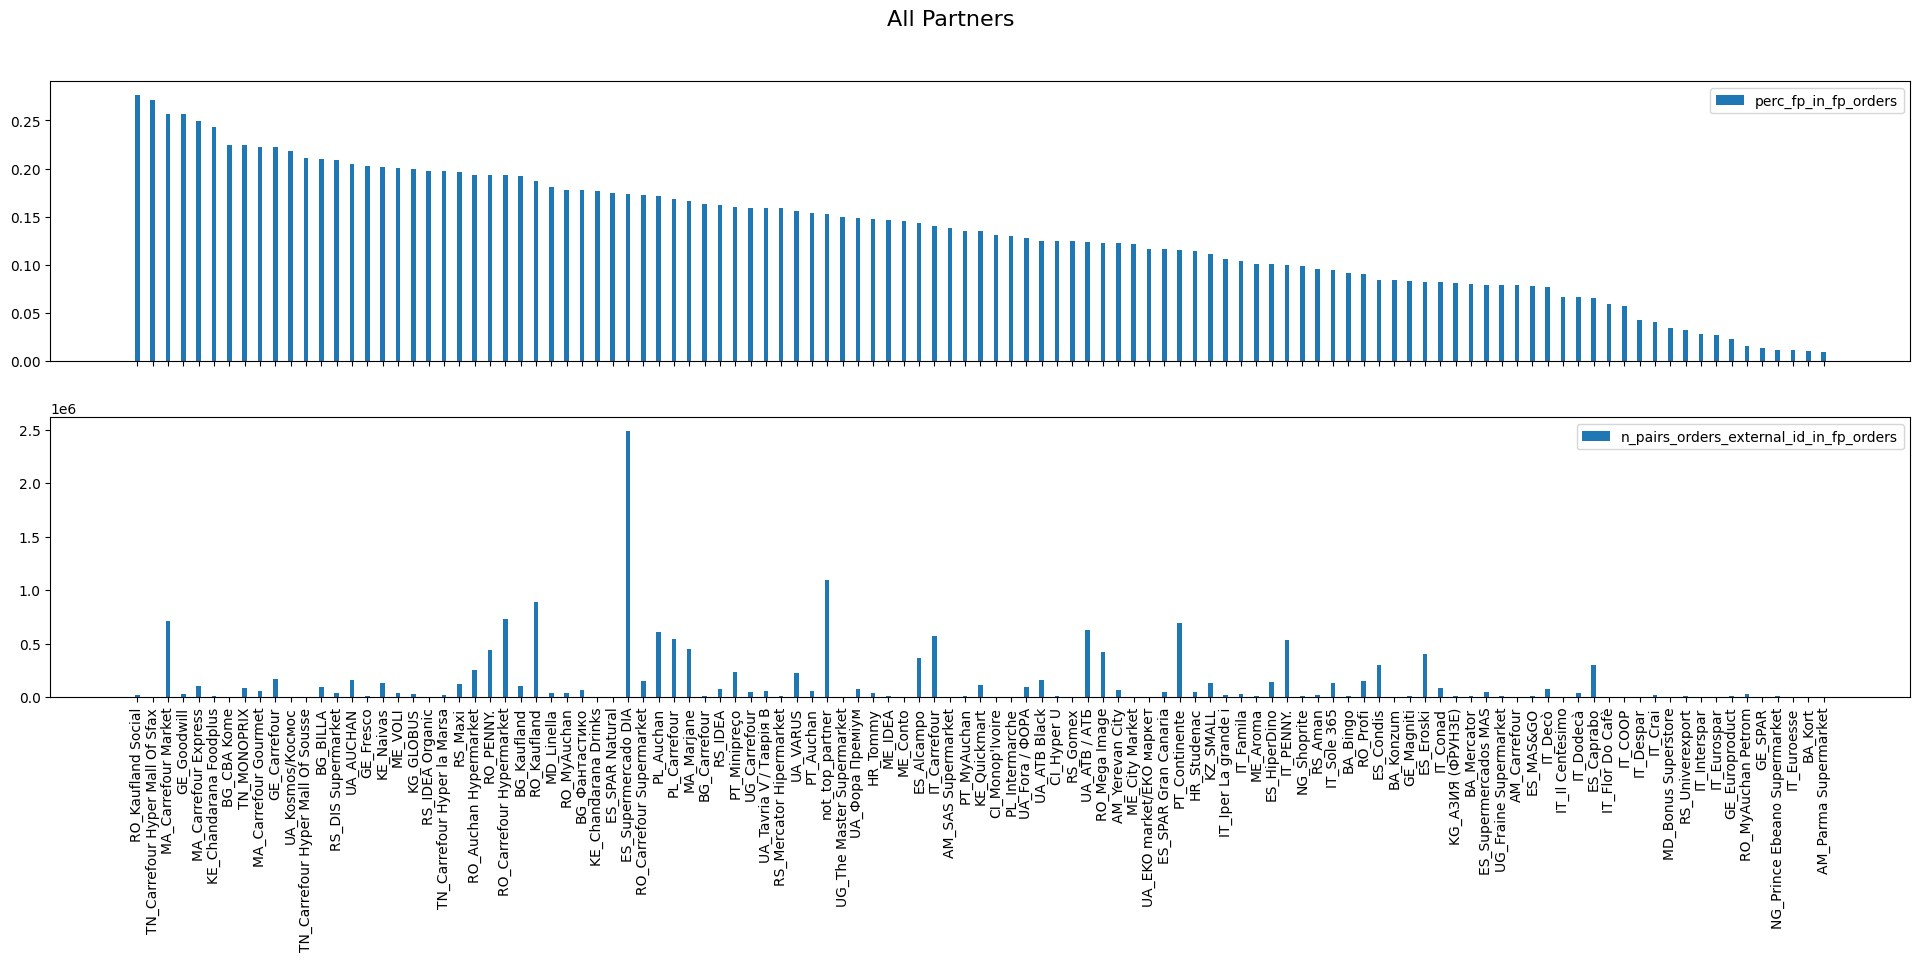

In [120]:
# All countries together
cond = tmp['store_name'] =='not_top_partner'
tmp2 = tmp[cond].copy()

tmp2_grouped = tmp2.groupby('store_name')[['n_pairs_orders_external_id_in_fp_orders','n_pairs_orders_fp_external_id_in_fp_orders']].sum().reset_index()
tmp2_grouped.rename(columns={'store_name':'concat_name'}, inplace=True)

tmp['concat_name'] = tmp['country_code'] + '_' + tmp['store_name']

tmp_grouped = tmp[~cond].groupby('concat_name')[['n_pairs_orders_external_id_in_fp_orders','n_pairs_orders_fp_external_id_in_fp_orders']].sum().reset_index()

tmp_grouped_concat = pd.concat(
    [tmp_grouped,tmp2_grouped]
)

tmp_grouped_concat['perc_fp_in_fp_orders'] = tmp_grouped_concat['n_pairs_orders_fp_external_id_in_fp_orders']/tmp_grouped_concat['n_pairs_orders_external_id_in_fp_orders']
tmp_grouped_concat.sort_values(by='perc_fp_in_fp_orders', ascending=False ,inplace=True)


# Create an instance of DataFrameVisualizer
v = dataframe_visualizer.DataFrameVisualizer(tmp_grouped_concat)

# Define the plot configurations for each subplot
plot_params = [
    {
        'plot_type': 'barplot',
        'x_column': 'concat_name',
        'y_columns': ['perc_fp_in_fp_orders'],
        'legend': True,
    },
    {
        'plot_type': 'barplot',
        'x_column': 'concat_name',
        'y_columns': ['n_pairs_orders_external_id_in_fp_orders'],
        'legend': True,
    },
]

# Define figure parameters
figure_params = {
    'n_plots': 2,
    'fig_length': 24,  
    'fig_height': 8,   
    'x_rotation': 90,  
    'x_limits': None,  
    'y_limits': None,  
    'share_x': True,   
    'share_y': False,   
    'title': 'All Partners'
}

# Create the static plot
v.plot(
    figure_params=figure_params,
    plot_params=plot_params
)